<a href="https://colab.research.google.com/github/Prettyzainee/TimeSerials_FinancialNews/blob/main/Zainab_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(style ="whitegrid")
file_path ="/content/financial_news_events.csv"
df = pd.read_csv(file_path)
df.copy()
df.head()

,Date,Headline,Source,Market_Event,Market_Index,Index_Change_Percent,Trading_Volume,Sentiment,Sector,Impact_Level,Related_Company,News_Url
0,2025-05-21,Nikkei 225 index benefits from a weaker yen,Times of India,Commodity Price Shock,DAX,3.52,166.45,NaN,Technology,High,Goldman Sachs,https://timesofindia.indiatimes.com/business/m...
1,2025-05-18,Government subsidy program gives a lift to the...,Financial Times,Central Bank Meeting,Shanghai Composite,-3.39,57.61,NaN,Retail,Low,ExxonMobil,https://timesofindia.indiatimes.com/business/m...
2,2025-06-25,New housing data release shows a slowdown in m...,The Hindu Business Line,Consumer Confidence Report,Shanghai Composite,-0.05,403.22,Neutral,Retail,Medium,Boeing,https://www.moneycontrol.com/us-markets/sp-500
3,2025-07-21,Massive stock buyback program announced by a c...,The Economist,Commodity Price Shock,NSE Nifty,-2.29,100.11,Positive,Consumer Goods,Low,Samsung Electronics,https://www.cnbc.com/2025/09/automotive-indust...
4,2025-07-23,Government spending bill is expected to stimul...,The Motley Fool,Inflation Data Release,Nasdaq Composite,-3.97,438.22,Negative,Consumer Goods,Low,JP Morgan Chase,https://www.bloomberg.com/australia/asx-200-pe...


In [ ]:
#checking the datatype,shape describe
print(df.shape)
print(df.dtypes)
print(df.describe())


(3024, 12)
Date                     object
Headline                 object
Source                   object
Market_Event             object
Market_Index             object
Index_Change_Percent    float64
Trading_Volume          float64
Sentiment                object
Sector                   object
Impact_Level             object
Related_Company          object
News_Url                 object
dtype: object
       Index_Change_Percent  Trading_Volume
count           2863.000000     3024.000000
mean              -0.021753      249.037917
std                2.851991      145.497932
min               -4.990000        1.060000
25%               -2.450000      120.427500
50%               -0.100000      244.020000
75%                2.475000      377.000000
max                5.000000      499.830000


In [ ]:
#check for missing value in column
df.isnull().sum()

,0
Date,0
Headline,148
Source,0
Market_Event,0
Market_Index,0
Index_Change_Percent,161
Trading_Volume,0
Sentiment,171
Sector,0
Impact_Level,0


In [ ]:
#cheching for duplicate value
df.duplicated().sum()

np.int64(0)

In [ ]:
#checking for wrong datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  3024 non-null   object 
 1   Headline              2876 non-null   object 
 2   Source                3024 non-null   object 
 3   Market_Event          3024 non-null   object 
 4   Market_Index          3024 non-null   object 
 5   Index_Change_Percent  2863 non-null   float64
 6   Trading_Volume        3024 non-null   float64
 7   Sentiment             2853 non-null   object 
 8   Sector                3024 non-null   object 
 9   Impact_Level          3024 non-null   object 
 10  Related_Company       3024 non-null   object 
 11  News_Url              2871 non-null   object 
dtypes: float64(2), object(10)
memory usage: 283.6+ KB


In [ ]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Display the data types to confirm the conversion
print(df.dtypes)

Date                    datetime64[ns]
Headline                        object
Source                          object
Market_Event                    object
Market_Index                    object
Index_Change_Percent           float64
Trading_Volume                 float64
Sentiment                       object
Sector                          object
Impact_Level                    object
Related_Company                 object
News_Url                        object
dtype: object


/tmp/ipython-input-2663562513.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2025-05-21', periods=36, freq='M')


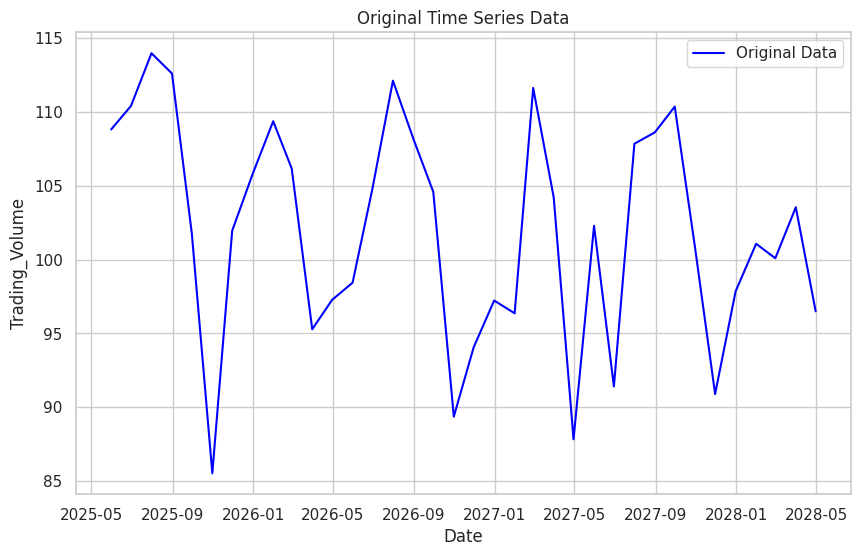

In [ ]:
# Example: Generate some sample time series data (monthly Trading_Volume)
np.random.seed(0)
date_range = pd.date_range(start='2025-05-21', periods=36, freq='M')
Trading_Volume = 100 + np.sin(np.arange(36)) * 10 + np.random.normal(scale=5, size=36)


# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(date_range, Trading_Volume, label='Original Data', color='blue')
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Trading_Volume')
plt.legend()
plt.grid(True)



In [ ]:
# Decompose the time series using an additive model
decomposition = seasonal_decompose(Trading_Volume, model='additive', period=12)

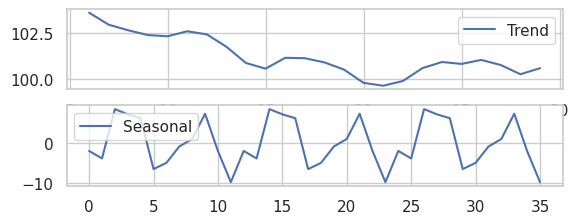

In [ ]:
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

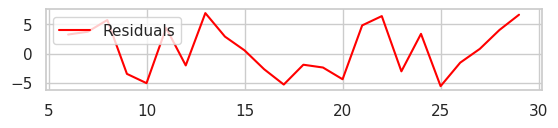

In [ ]:
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')

Text(0, 0.5, 'Trading_Volume')

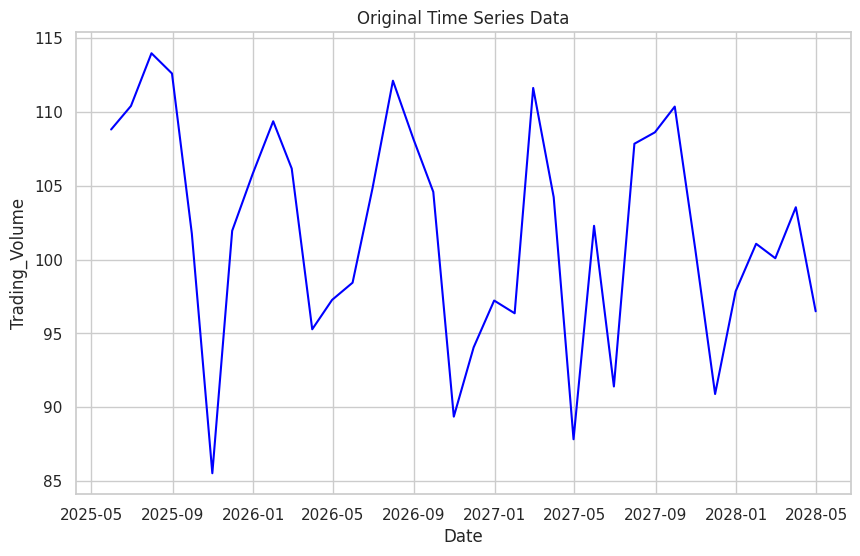

In [ ]:
# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(date_range, Trading_Volume, label='Original Data', color='blue')
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Trading_Volume')

**Check for Stationarity**


**Using Rolling Mean and Standard Deviation**

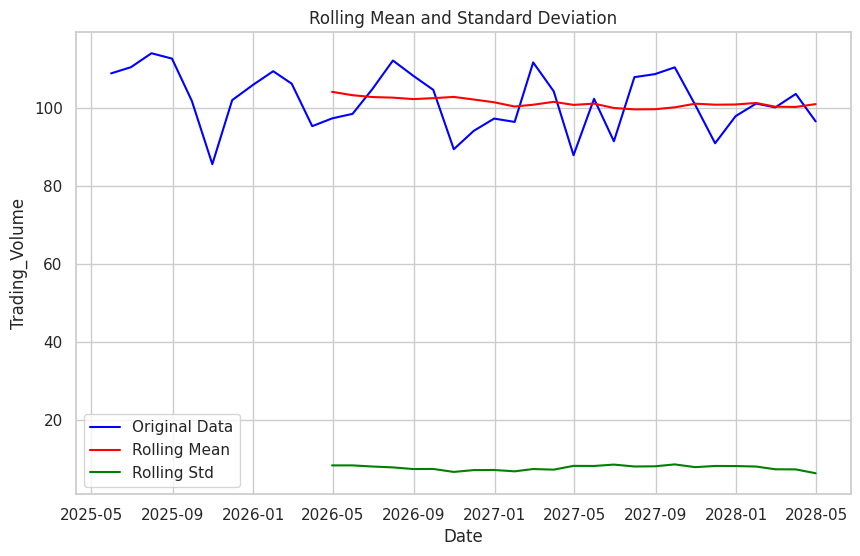

In [ ]:
# Calculate rolling statistics
rolling_mean = pd.Series(Trading_Volume).rolling(window=12).mean()
rolling_std = pd.Series(Trading_Volume).rolling(window=12).std()

# Calculate rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(date_range, Trading_Volume, label='Original Data', color='blue')
plt.plot(date_range, rolling_mean, label='Rolling Mean', color='red')
plt.plot(date_range, rolling_std, label='Rolling Std', color='green')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Trading_Volume')
plt.legend()
plt.grid(True)



**Original Time Series (Blue Line)**

The blue line in the plot shows the original time series data for the 'Trading_Volume'. This is the raw data before any decomposition or smoothing techniques are applied. It represents the fluctuations in trading volume over the observed time period.

**Rolling Mean (Moving Average):**

The rolling mean, also known as the moving average, is a common technique used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles. It is calculated by taking the average of a fixed number of data points within a sliding window. As the window moves through the time series, a new average is calculated at each step.

*   **Purpose:** To reduce noise and reveal underlying patterns in the data.
*   **How it's calculated:** For a given window size, the average is computed for the first 'n' data points. Then, the window slides one position forward, and the average is computed for the next 'n' data points, and so on.

**Rolling Standard Deviation:**

The rolling standard deviation is another useful statistic for time series analysis. It measures the variability or volatility of the data within a sliding window. Like the rolling mean, it helps to understand how the dispersion of the data changes over time.

*   **Purpose:** To assess the volatility or risk associated with a time series.
*   **How it's calculated:** For a given window size, the standard deviation is computed for the data points within that window. The window then slides forward, and the standard deviation is recalculated.

In the context of the time series plots, the rolling mean helps to visualize the trend, while the rolling standard deviation helps to visualize how the variability of the Trading Volume changes over time. If the rolling mean is relatively constant and the rolling standard deviation is also relatively constant, it suggests that the time series might be stationary (meaning its statistical properties do not change over time), which is an important assumption for many time series forecasting models.

## Using Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(Trading_Volume)

# Extract ADF test results
print(f'adf_statistic:  {adf_result[0]}')
print(f'p_value: {adf_result[1]}')

#checking critical values
for key, value in adf_result[4].items():
    print(f'critical value {key} : {value}')

adf_statistic:  -6.207434859270118
p_value: 5.613162516520427e-08
critical value 1% : -3.653519805908203
critical value 5% : -2.9572185644531253
critical value 10% : -2.6175881640625


### Notes on Augmented Dickey-Fuller (ADF) Test Results

The Augmented Dickey-Fuller test is a statistical test used to determine if a time series is stationary. A stationary time series is one whose statistical properties (like mean and variance) do not change over time.

Here's a breakdown of the results from the ADF test:

*   **ADF Statistic:** This is the test statistic. A more negative value indicates a stronger rejection of the null hypothesis (that the time series is non-stationary).
    *   In this case, the ADF statistic is **-6.207**, which is a large negative number.

*   **P-value:** This is the probability of observing the test results, or more extreme results, if the null hypothesis is true. A small p-value (typically less than 0.05) suggests that the data is unlikely to have occurred under the null hypothesis, leading to the rejection of the null hypothesis.
    *   The p-value is **5.613e-08**, which is very close to zero. This is much smaller than the typical significance level of 0.05.

*   **Critical Values:** These are the threshold values at different significance levels (1%, 5%, and 10%). If the ADF statistic is less than (more negative than) the critical value at a given significance level, it means we can reject the null hypothesis at that level of significance.
    *   1% Critical Value: **-3.653**
    *   5% Critical Value: **-2.957**
    *   10% Critical Value: **-2.617**

**Interpretation:**

Since the ADF statistic (-6.207) is significantly more negative than all of the critical values, and the p-value (5.613e-08) is much less than 0.05, we **reject the null hypothesis** that the time series is non-stationary.

**Conclusion:**

Based on the Augmented Dickey-Fuller test results, there is strong evidence to suggest that the 'Trading_Volume' time series is **stationary**. This is a desirable property for many time series forecasting models.

**Converting Non Statinary to Stationary Time Series**

**Using first-order differencing**

adf_statistic:  -17.683240702399296
p_value: 3.600102558868018e-30


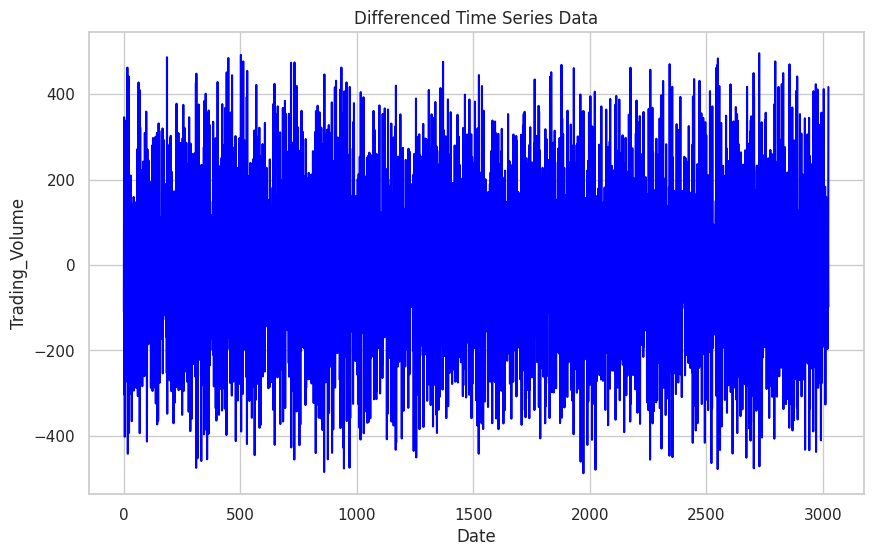

In [ ]:
# Apply first-order differencing

# Plot the differenced data
data_dff = df['Trading_Volume'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(data_dff, label='First-Order Differencing Data', color='blue')
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.ylabel('Trading_Volume')


#performance ADT test on difference data
adf_result = adfuller(data_dff)

# Extract ADF test results
print(f'adf_statistic:  {adf_result[0]}')
print(f'p_value: {adf_result[1]}')

### Notes on the Differenced Time Series Plot

The plot above shows the result of applying first-order differencing to the 'Trading_Volume' data. First-order differencing is a common technique used to transform a non-stationary time series into a stationary one.

* **What is Differencing?** Differencing calculates the difference between consecutive data points in the time series. This process removes the trend component, which is often the primary cause of non-stationarity.
* **Interpreting the Plot:** In a stationary time series, the statistical properties (like mean and variance) remain constant over time. After differencing, if the plot shows the data fluctuating around a constant mean (often zero) with a relatively constant variance, it suggests that the original time series has been made stationary.

The plot of the differenced 'Trading_Volume' data appears to be centered around zero and does not exhibit a clear upward or downward trend, which visually indicates that the differenced series is likely stationary.

**ADF Test After Differencing:**

The Augmented Dickey-Fuller (ADF) test performed on this differenced data in the previous step provides a statistical confirmation of this visual assessment.

**Key Insight**

Based on the visual inspection of the differenced time series plot and the results of the Augmented Dickey-Fuller (ADF) test, the 'Trading_Volume' time series, after first-order differencing, appears to be stationary. This is a significant finding as stationarity is a crucial assumption for applying many time series forecasting models. The ADF test confirmed this visually by showing a very low p-value and a test statistic more negative than the critical values.

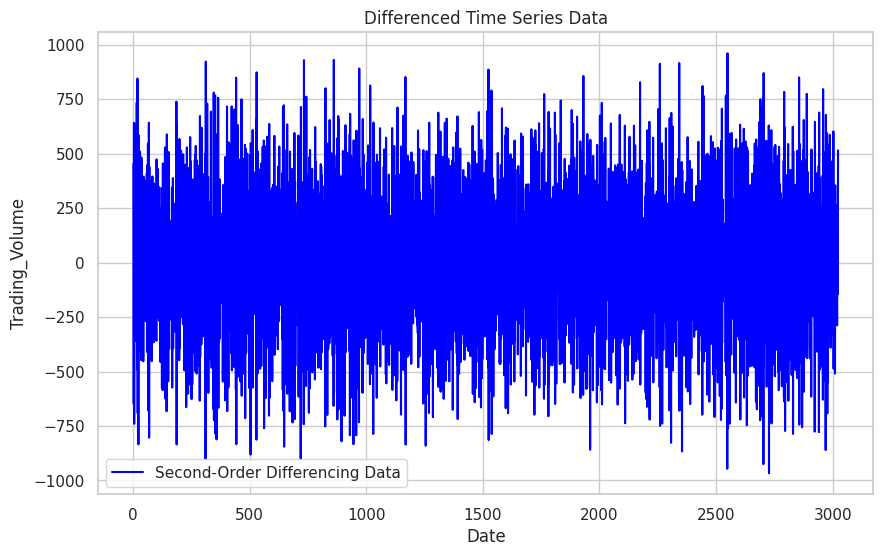

adf_statistic:  -22.787840906858747
p_value: 0.0
adf_statistic:  -22.787840906858747
p_value: 0.0


In [26]:
# Apply second-order differencing

data_dfff2 = df['Trading_Volume'].diff().diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_dfff2, label='Second-Order Differencing Data', color='blue')
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.ylabel('Trading_Volume')
plt.legend()
plt.show()

# Perform ADF test on differenced data
adf_result = adfuller(data_dfff2)
print(f'adf_statistic:  {adf_result[0]}')
print(f'p_value: {adf_result[1]}')

# Extract ADF test results
print(f'adf_statistic:  {adf_result[0]}')
print(f'p_value: {adf_result[1]}')

#

### Notes on the Second-Order Differencing Plot

The plot above displays the time series after applying second-order differencing to the 'Trading_Volume' data.

* **Second-Order Differencing:** This technique involves taking the difference of the already first-differenced series. It's used when first-order differencing is not enough to achieve stationarity, often in cases where there's a quadratic trend in the original data.
* **Interpreting the Plot:** Similar to first-order differencing, a stationary time series after second-order differencing should exhibit fluctuations around a constant mean (ideally zero) with relatively constant variance.

Visually, the second-order differenced data in the plot also appears to be centered around zero with no obvious trend, suggesting stationarity.

**ADF Test Results After Second-Order Differencing:**

The Augmented Dickey-Fuller (ADF) test was performed on this second-order differenced data, and the results are:

* **ADF Statistic:** -22.787840906858747
* **P-value:** 0.0

**Conclusion:**

The ADF test results show a very large negative ADF statistic and a p-value of 0.0, which is significantly less than the typical significance level of 0.05. This provides strong statistical evidence to reject the null hypothesis of non-stationarity.

Therefore, based on both the visual inspection of the plot and the ADF test results, the 'Trading_Volume' time series is stationary after applying second-order differencing. In time series modeling, you would typically use the lowest order of differencing required to achieve stationarity. Since first-order differencing was sufficient in this case (as shown by the previous ADF test), second-order differencing was not strictly necessary but further confirms the stationarity.